link: http://setosa.io/ev/image-kernels/
for reference to interactive convolutions.

link: https://github.com/vdumoulin/conv_arithmetic
for reference to convolution animations.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

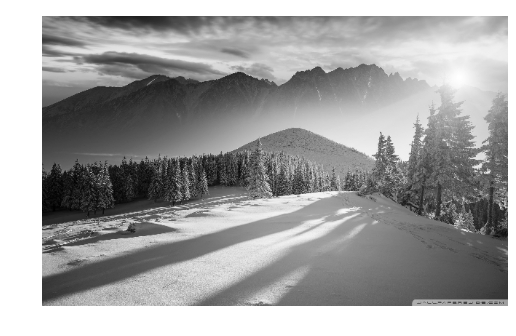

In [13]:
# Load an Image
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
im = cv2.resize(im, (640, 400))

plt.figure(0)
plt.axis("off")
plt.imshow(im, cmap='gray')
plt.show()

[[-2. -1.  0.]
 [-1.  1.  1.]
 [ 0.  1.  2.]] 1.0


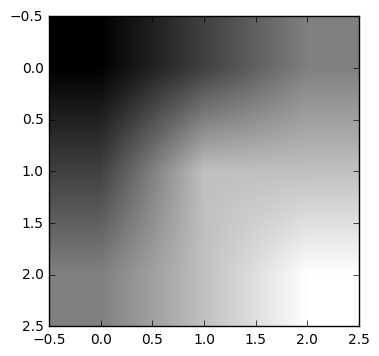

In [43]:
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]], dtype='float32')

print kernel, kernel.sum()

plt.imshow(kernel, cmap='gray')
plt.show()

In [38]:
def hadamard_prod(mat_01, mat_02):
    m, n = mat_01.shape
    p, q = mat_02.shape
    
    if not (m==p and n==q):
        return 0 # Error
    return mat_01*mat_02

def convolution2D(image, kernel):
    m, n = image.shape
    p, q = kernel.shape
    out = np.zeros((m-p+1, n-q+1))
    
    # Convolve here
    for ix in range(out.shape[0]):
        for iy in range(out.shape[1]):
            im_patch = image[ix:ix+p, iy:iy+q]
            prod = hadamard_prod(im_patch, kernel)
            val = prod.sum()
            if val < 0:
                val = 0.0
            elif val > 255:
                val = 255.0
            out[ix, iy] = val
    return out

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]] 0.0


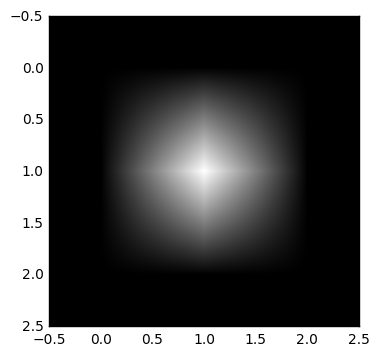

In [45]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]], dtype='float32')

print kernel, kernel.sum()

plt.imshow(kernel, cmap='gray')
plt.show()

(398, 638)


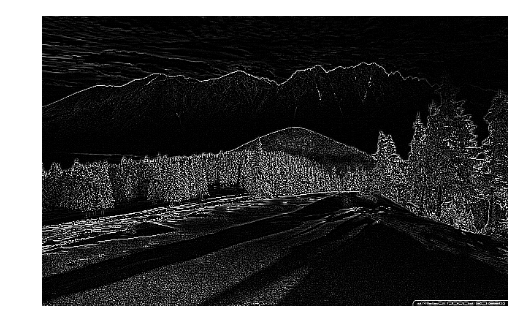

In [46]:
c = convolution2D(im, kernel)
print c.shape

plt.figure(0)
plt.axis("off")
plt.imshow(c, cmap='gray')
plt.show()